# SOLO HAY DATOS DESDE 1950

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import glob
import sys

In [3]:
#np.intersect1d?

In [4]:
path_input='/media/javi/data_win/Investigacion/Doctorado/Tesis/Mi_tesis/Estaciones_pluviometricas_España_AEMET/'

In [5]:
Estaciones_AEMET=pd.read_csv(path_input + '201704_Inventario_AEMET.csv', sep=', ')

/home/javi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


/home/javi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/javi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


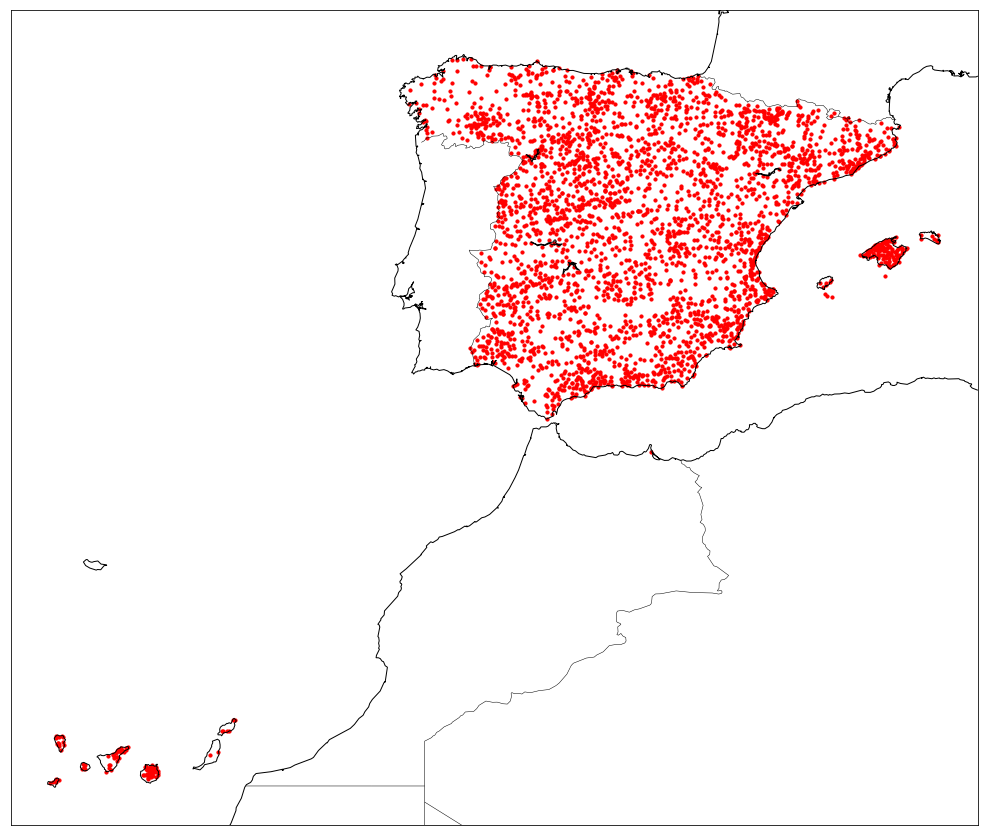

In [6]:
fig, ax = plt.subplots(figsize=(30,15))
m = Basemap(projection='mill',\
        llcrnrlat=Estaciones_AEMET['Latitud'].values.min()-1,urcrnrlat=Estaciones_AEMET['Latitud'].values.max()+1,\
        llcrnrlon=Estaciones_AEMET['Longitud'].values.min()-1,urcrnrlon=Estaciones_AEMET['Longitud'].values.max()+1,\
        #llcrnrlat=34.20,urcrnrlat=34.6,\
        #llcrnrlon=-108,urcrnrlon=-107.5,\
        rsphere=6371200.,resolution='i', suppress_ticks=True)
lons=Estaciones_AEMET['Longitud'].values
lats=Estaciones_AEMET['Latitud'].values
x, y = m(lons,lats)
m.scatter(x, y, 10, marker='o',color='r')
m.drawcoastlines(linewidth=1.)
m.drawcountries(linewidth=.5)
#cbar = m.colorbar(cs,location='bottom',pad="5%")
#cbar.set_label('Geopotential Height (m)')

Convierto las fechas de inicio y fin en datetime

In [7]:
from dateutil import parser

In [8]:
StartDate=[parser.parse(t) for t in Estaciones_AEMET['StartDate'].values]
EndDate=[parser.parse(t) for t in Estaciones_AEMET['EndDate'].values]

In [9]:
Estaciones_AEMET.StartDate=StartDate
Estaciones_AEMET.EndDate=EndDate

In [10]:
Estaciones_AEMET

,Id,Name,Longitud,Latitud,Height,StartDate,EndDate,Missing Percentage
0,0001,EL PERELLO ...,0.71139,40.8750,142.0,1961-01-01 07:00:00,2015-12-31 07:00:00,0.451745
1,0002,L'AMETLLA DE MAR ...,0.80083,40.8847,22.0,1918-02-01 07:00:00,2008-03-31 07:00:00,10.643395
2,0002I,VANDELLOS (CENTRAL NUCLEAR) ...,0.87167,40.9586,34.0,1968-03-01 07:00:00,2015-12-31 07:00:00,12.559890
3,0008,MONTBRIO DEL CAMP ...,1.00360,41.1194,120.0,1946-06-01 07:00:00,2009-07-31 07:00:00,7.043121
4,0009,ALFORJA (HOSPITAL) ...,0.97583,41.2086,370.0,1982-01-01 07:00:00,2015-12-31 07:00:00,27.522245
5,0013,CAMBRILS ...,1.05360,41.0736,19.0,1916-01-01 07:00:00,2009-03-31 07:00:00,36.899384
6,0016,REUS ...,1.11670,41.1500,100.0,1922-01-01 07:00:00,1988-05-31 07:00:00,58.357290
7,0016A,REUS (AEROPORT) ...,1.17890,41.1497,68.0,1945-02-01 07:00:00,2015-12-31 07:00:00,0.458590
8,0016B,REUS (CENTRE LECTURA) ...,1.10860,41.1539,138.0,1934-03-01 07:00:00,2015-12-31 07:00:00,7.652293
9,0017,VILASECA DE SOLCINA ...,1.14500,41.1117,53.0,1929-01-01 07:00:00,2015-12-31 07:00:00,3.566051


In [11]:
import datetime

In [12]:
ini=Estaciones_AEMET.StartDate<datetime.datetime(1979,1,1)
fin=Estaciones_AEMET.EndDate>datetime.datetime(2010,12,31)
pos=ini & fin

In [13]:
Estaciones_AEMET_1979_2013=Estaciones_AEMET[pos]

In [14]:
Estaciones_AEMET_1979_2013

,Id,Name,Longitud,Latitud,Height,StartDate,EndDate,Missing Percentage
0,0001,EL PERELLO ...,0.71139,40.8750,142.0,1961-01-01 07:00:00,2015-12-31 07:00:00,0.451745
2,0002I,VANDELLOS (CENTRAL NUCLEAR) ...,0.87167,40.9586,34.0,1968-03-01 07:00:00,2015-12-31 07:00:00,12.559890
7,0016A,REUS (AEROPORT) ...,1.17890,41.1497,68.0,1945-02-01 07:00:00,2015-12-31 07:00:00,0.458590
8,0016B,REUS (CENTRE LECTURA) ...,1.10860,41.1539,138.0,1934-03-01 07:00:00,2015-12-31 07:00:00,7.652293
9,0017,VILASECA DE SOLCINA ...,1.14500,41.1117,53.0,1929-01-01 07:00:00,2015-12-31 07:00:00,3.566051
11,0020,VIMBODI ...,1.04940,41.3958,488.0,1954-11-01 07:00:00,2013-08-31 07:00:00,0.027379
12,0020O,VIMBODI (MONESTIR DE POBLET) ...,1.08190,41.3817,494.0,1974-12-01 07:00:00,2015-12-31 07:00:00,33.860370
13,0022,MONTBLANC ...,1.16670,41.3764,340.0,1914-03-01 07:00:00,2015-12-31 07:00:00,0.841889
14,0024,ROCAFORT DE QUERALT ...,1.28140,41.4778,510.0,1930-10-01 07:00:00,2015-09-30 07:00:00,0.424367
15,0025,SARRAL ...,1.24860,41.4458,400.0,1929-02-01 07:00:00,2015-12-31 07:00:00,0.232717


Cargo la estacion que quiera

In [15]:
##Cargo los cuatro ficheros iniciales que contienen todas las estaciones para buscar la que yo quiera
path_estaciones_AEMET='/media/javi/data_win/Investigacion/Doctorado/Tesis/Mi_tesis/Estaciones_pluviometricas_España_AEMET\
/2016_pet080_UNICAN/data/'

In [16]:
Estaciones_AEMET_=pd.read_csv('/media/javi/data_win/Investigacion/Doctorado/Tesis/Mi_tesis/\
Estaciones_pluviometricas_España_AEMET/2016_pet080_UNICAN/' + 'Estaciones_csv.csv')

In [17]:
Estaciones_AEMET_

,IND,ESTACION,LON,LAT,ALT
0,0001,EL PERELLO,0.71139,40.8750,142.0
1,0002,L'AMETLLA DE MAR,0.80083,40.8847,22.0
2,0002I,VANDELLOS (CENTRAL NUCLEAR),0.87167,40.9586,34.0
3,0008,MONTBRIO DEL CAMP,1.00360,41.1194,120.0
4,0009,ALFORJA (HOSPITAL),0.97583,41.2086,370.0
5,0013,CAMBRILS,1.05360,41.0736,19.0
6,0016,REUS,1.11670,41.1500,100.0
7,0016A,REUS (AEROPORT),1.17890,41.1497,68.0
8,0016B,REUS (CENTRE LECTURA),1.10860,41.1539,138.0
9,0017,VILASECA DE SOLCINA,1.14500,41.1117,53.0


In [18]:
folders=['Ind_0001_3015', 'Ind_3018E_6250', 'Ind_6251_9812E', 'Ind_9813_C939U']

In [19]:
#creo time

In [20]:
#Ind_0001_3015=pd.read_csv('/media/javi/data_win/Investigacion/Doctorado/Tesis/Mi_tesis/\
#Estaciones_pluviometricas_España_AEMET/2016_pet080_UNICAN/' 'Datos-Pd(1950-1954).csv')

Ind_0001_3015=pd.read_csv(path_estaciones_AEMET + folders[0] + '/' + 'Datos-Pd(1950-1954).txt', sep=';', encoding='latin-1')
Ind_3018E_6250=pd.read_csv(path_estaciones_AEMET + folders[1] + '/' + 'Datos-Pd(1950-1952).txt', sep=';', encoding='latin-1')
Ind_6251_9812E=pd.read_csv(path_estaciones_AEMET + folders[2] + '/' + 'Datos-Pd(1950-1953).txt', sep=';', encoding='latin-1')
Ind_9813_C939U=pd.read_csv(path_estaciones_AEMET + folders[3] + '/' + 'Datos-Pd(1950-1956).txt', sep=';', encoding='latin-1')

/home/javi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/javi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/javi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
import tqdm

In [22]:
time=pd.date_range(start='1950-01-01', end='2015-12-31', freq='D')

files=glob.glob(path_estaciones_AEMET + folders[0] + '/' + 'Datos-Pd*')
files=np.sort(files)

ids = []
for i in tqdm.tqdm(files):

    aux=pd.read_csv(i, sep=';', encoding='latin-1')
    #aux.INDICATIVO=aux.INDICATIVO.values.astype('str')
    for xx, x in enumerate(aux.INDICATIVO):
        if isinstance(x, float): x=int(x); #convierto en int
        if isinstance(x, int): x=str(x);  #convierto en str
        if x not in ids: ids.append(x) #no los guardo si ya están repedidos

Ind_0001_3015=pd.DataFrame(index=time, columns=ids)
for i in tqdm.tqdm(files):

    aux=pd.read_csv(i, sep=';', encoding='latin-1')
    #aux.INDICATIVO=aux.INDICATIVO.values.astype('str')
    ids = []
    ids_t = []
    foats = []
    for xx, x in enumerate(aux.INDICATIVO):
        if isinstance(x, float): x=int(x); #convierto en int
        if isinstance(x, int): x=str(x);  #convierto en str
        ids_t.append(x)
        if x not in ids: ids.append(x) #no los guardo si ya están repedidos
    aux.INDICATIVO=ids_t    

    for x in ids:
        aux_cut=aux.copy(); aux_cut=aux_cut.loc[np.where(aux_cut.INDICATIVO==x)[0]]        
        time_aux=[datetime.datetime(aux_cut.AÑO.values[t],aux_cut.MES.values[t],aux_cut.DIA.values[t]) for t in range(len(aux_cut.AÑO))]
        dataframe_aux=pd.DataFrame(index=time_aux); dataframe_aux[x]=aux_cut.P77.values
        Ind_0001_3015[x].loc[dataframe_aux.index]=dataframe_aux.values
        
Ind_0001_3015.to_csv(path_estaciones_AEMET + folders[0] + '/' + 'Ind_0001_3015_join.csv')

  0%|          | 0/17 [00:00<?, ?it/s]/home/javi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
  6%|▌         | 1/17 [00:04<01:18,  4.93s/it]/home/javi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 17/17 [39:53<00:00, 116.27s/it]


In [23]:
time=pd.date_range(start='1950-01-01', end='2015-12-31', freq='D')

files=glob.glob(path_estaciones_AEMET + folders[1] + '/' + 'Datos-Pd*')
files=np.sort(files)

ids = []
for i in tqdm.tqdm(files):

    aux=pd.read_csv(i, sep=';', encoding='latin-1')
    #aux.INDICATIVO=aux.INDICATIVO.values.astype('str')
    for xx, x in enumerate(aux.INDICATIVO):
        if isinstance(x, float): x=int(x); #convierto en int
        if isinstance(x, int): x=str(x);  #convierto en str
        if x not in ids: ids.append(x) #no los guardo si ya están repedidos

Ind_3018E_6250=pd.DataFrame(index=time, columns=ids)
for i in tqdm.tqdm(files):

    aux=pd.read_csv(i, sep=';', encoding='latin-1')
    #aux.INDICATIVO=aux.INDICATIVO.values.astype('str')
    ids = []
    ids_t = []
    foats = []
    for xx, x in enumerate(aux.INDICATIVO):
        if isinstance(x, float): x=int(x); #convierto en int
        if isinstance(x, int): x=str(x);  #convierto en str
        ids_t.append(x)
        if x not in ids: ids.append(x) #no los guardo si ya están repedidos
    aux.INDICATIVO=ids_t    

    for x in ids:
        aux_cut=aux.copy(); aux_cut=aux_cut.loc[np.where(aux_cut.INDICATIVO==x)[0]]        
        time_aux=[datetime.datetime(aux_cut.AÑO.values[t],aux_cut.MES.values[t],aux_cut.DIA.values[t]) for t in range(len(aux_cut.AÑO))]
        dataframe_aux=pd.DataFrame(index=time_aux); dataframe_aux[x]=aux_cut.P77.values
        Ind_3018E_6250[x].loc[dataframe_aux.index]=dataframe_aux.values
        
Ind_3018E_6250.to_csv(path_estaciones_AEMET + folders[1] + '/' + 'Ind_3018E_6250_join.csv')

  0%|          | 0/18 [00:00<?, ?it/s]/home/javi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 18/18 [39:08<00:00, 121.43s/it]


In [24]:
time=pd.date_range(start='1950-01-01', end='2015-12-31', freq='D')

files=glob.glob(path_estaciones_AEMET + folders[2] + '/' + 'Datos-Pd*')
files=np.sort(files)

ids = []
for i in tqdm.tqdm(files):

    aux=pd.read_csv(i, sep=';', encoding='latin-1')
    #aux.INDICATIVO=aux.INDICATIVO.values.astype('str')
    for xx, x in enumerate(aux.INDICATIVO):
        if isinstance(x, float): x=int(x); #convierto en int
        if isinstance(x, int): x=str(x);  #convierto en str
        if x not in ids: ids.append(x) #no los guardo si ya están repedidos

Ind_6251_9812E=pd.DataFrame(index=time, columns=ids)
for i in tqdm.tqdm(files):

    aux=pd.read_csv(i, sep=';', encoding='latin-1')
    #aux.INDICATIVO=aux.INDICATIVO.values.astype('str')
    ids = []
    ids_t = []
    foats = []
    for xx, x in enumerate(aux.INDICATIVO):
        if isinstance(x, float): x=int(x); #convierto en int
        if isinstance(x, int): x=str(x);  #convierto en str
        ids_t.append(x)
        if x not in ids: ids.append(x) #no los guardo si ya están repedidos
    aux.INDICATIVO=ids_t    

    for x in ids:
        aux_cut=aux.copy(); aux_cut=aux_cut.loc[np.where(aux_cut.INDICATIVO==x)[0]]        
        time_aux=[datetime.datetime(aux_cut.AÑO.values[t],aux_cut.MES.values[t],aux_cut.DIA.values[t]) for t in range(len(aux_cut.AÑO))]
        dataframe_aux=pd.DataFrame(index=time_aux); dataframe_aux[x]=aux_cut.P77.values
        Ind_6251_9812E[x].loc[dataframe_aux.index]=dataframe_aux.values
        
Ind_6251_9812E.to_csv(path_estaciones_AEMET + folders[2] + '/' + 'Ind_6251_9812E_join.csv')

  0%|          | 0/18 [00:00<?, ?it/s]/home/javi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 11%|█         | 2/18 [00:10<01:20,  5.03s/it]/home/javi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 18/18 [38:24<00:00, 122.09s/it]


In [25]:
time=pd.date_range(start='1950-01-01', end='2015-12-31', freq='D')

files=glob.glob(path_estaciones_AEMET + folders[3] + '/' + 'Datos-Pd*')
files=np.sort(files)

ids = []
for i in tqdm.tqdm(files):

    aux=pd.read_csv(i, sep=';', encoding='latin-1')
    #aux.INDICATIVO=aux.INDICATIVO.values.astype('str')
    for xx, x in enumerate(aux.INDICATIVO):
        if isinstance(x, float): x=int(x); #convierto en int
        if isinstance(x, int): x=str(x);  #convierto en str
        if x not in ids: ids.append(x) #no los guardo si ya están repedidos

Ind_9813_C939U=pd.DataFrame(index=time, columns=ids)
for i in tqdm.tqdm(files):

    aux=pd.read_csv(i, sep=';', encoding='latin-1')
    #aux.INDICATIVO=aux.INDICATIVO.values.astype('str')
    ids = []
    ids_t = []
    foats = []
    for xx, x in enumerate(aux.INDICATIVO):
        if isinstance(x, float): x=int(x); #convierto en int
        if isinstance(x, int): x=str(x);  #convierto en str
        ids_t.append(x)
        if x not in ids: ids.append(x) #no los guardo si ya están repedidos
    aux.INDICATIVO=ids_t    

    for x in ids:
        aux_cut=aux.copy(); aux_cut=aux_cut.loc[np.where(aux_cut.INDICATIVO==x)[0]]        
        time_aux=[datetime.datetime(aux_cut.AÑO.values[t],aux_cut.MES.values[t],aux_cut.DIA.values[t]) for t in range(len(aux_cut.AÑO))]
        dataframe_aux=pd.DataFrame(index=time_aux); dataframe_aux[x]=aux_cut.P77.values
        Ind_9813_C939U[x].loc[dataframe_aux.index]=dataframe_aux.values
        
Ind_9813_C939U.to_csv(path_estaciones_AEMET + folders[3] + '/' + 'Ind_9813_C939U_join.csv')

100%|██████████| 8/8 [08:17<00:00, 67.97s/it]


In [26]:
print(np.shape(Ind_0001_3015))
print(np.shape(Ind_3018E_6250))
print(np.shape(Ind_6251_9812E))
print(np.shape(Ind_9813_C939U))

(60630, 1000)
(60630, 1000)
(60630, 999)
(60630, 382)


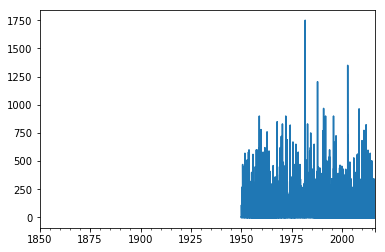

In [33]:
Ind_0001_3015['0069'].plot()

In [27]:
##junto los dataframes
Series_AEMET = pd.concat([Ind_0001_3015, Ind_3018E_6250, Ind_6251_9812E, Ind_9813_C939U],\
                         axis=1, join_axes=[Ind_0001_3015.index])

In [28]:
np.shape(Series_AEMET)

(60630, 3381)

In [50]:
for i in Series_AEMET.columns:
    if i in Estaciones_AEMET_.IND.values: a=1
    else: sys.exit()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


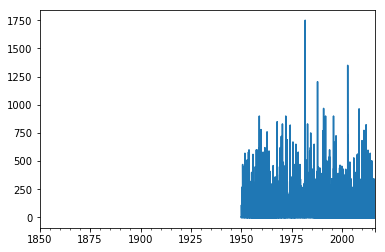

In [31]:
Series_AEMET['0069'].plot()

In [30]:
Series_AEMET.to_csv(path_estaciones_AEMET + 'Series_AEMET_join.csv')

In [111]:
Ind_0001_3015_ID = []
for x in Ind_0001_3015.INDICATIVO:
    if x not in Ind_0001_3015_ID:
        Ind_0001_3015_ID.append(x)

        
Ind_3018E_6250_ID = []
for x in Ind_0001_3015.INDICATIVO:
    if x not in Ind_3018E_6250_ID:
        Ind_3018E_6250_ID.append(x)

        
Ind_6251_9812E_ID = []
for x in Ind_0001_3015.INDICATIVO:
    if x not in Ind_6251_9812E_ID:
        Ind_6251_9812E_ID.append(x)

        
Ind_9813_C939U_ID = []
for x in Ind_0001_3015.INDICATIVO:
    if x not in Ind_9813_C939U_ID:
        Ind_9813_C939U_ID.append(x)

print(len(Ind_0001_3015_ID) + len(Ind_3018E_6250_ID) + len(Ind_6251_9812E_ID) + len(Ind_9813_C939U_ID))

1644


CFSR

In [47]:
from netCDF4 import Dataset

In [54]:
root_grp = Dataset('/media/javi/data_win/Investigacion/Doctorado/Tesis/Mi_tesis/CFSR/' + 'prate.gdas.198910.grb2.nc')
#Geo = root_grp.variables['Geo_500'][:]
xx = root_grp.variables['lon'][:]
yy = root_grp.variables['lat'][:]
[XX, YY]=np.meshgrid(xx, yy)

In [59]:
CFSR=pd.DataFrame()
CFSR['Longitud']=XX.reshape(np.size(XX))
CFSR['Latitud']=YY.reshape(np.size(YY))
CFSR.to_csv('/media/javi/data_win/Investigacion/Doctorado/Tesis/Mi_tesis/CFSR/CFSR_coordenadas.csv')

/mnt/ihdata/Wind/Wind_SW_CFS/Cantabrico

In [74]:
path_ca='/mnt/ihdata/Wind/Wind_SW_CFS/Cantabrico/'
root_grp = Dataset(path_ca + 'Wind_SW_CFS_Cantabrico_Mask.nc')
#Geo = root_grp.variables['Geo_500'][:]
xx = root_grp.variables['lon'][:]
yy = root_grp.variables['lat'][:]

In [75]:
SEA_WIND_CFSR_CANTABRIACO=pd.DataFrame()
SEA_WIND_CFSR_CANTABRIACO['Longitud']=xx.reshape(np.size(xx))
SEA_WIND_CFSR_CANTABRIACO['Latitud']=yy.reshape(np.size(yy))
SEA_WIND_CFSR_CANTABRIACO.to_csv('/media/javi/data_win/Investigacion/Doctorado/Tesis/Mi_tesis/SEA_WIND_CFSR_CANTABRIACO/SEA_WIND_CFSR_CANTABRIACO_coordenadas.csv')

GSmap_gauge_rnl

In [78]:
import gzip
import glob
import numpy as np

num_lon = 10
num_lat = 10

def read_bin(gz, num_lon, num_lat):
    arr = np.fromstring(gz.read(), dtype='f').reshape(num_lon, num_lat)
    return arr

for gz in (gzip.open(f) for f in glob.glob("/tmp/*.gz")):
    arr = read_bin(gz, num_lon, num_lat)
    print (arr[5, 3] )

In [119]:
np.mean([316.63333, 312.77997, 313.19626, 323.06412, 319.95853, 314.7293, 317.2284, 311.98386, 320.10474, 310.50885, 323.20758, 307.86542, 325.4753, 321.849, 309.11264, 307.42645, 317.3858, 320.25958, 322.55734, 323.979])

316.96527350000008